In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Candace Edwards <br>
ICS 635: Machine Learning <br>
Homework 1 <br>
Part 1: Q1- Q3 <br>
Part 2: Q4 in [C.Edwards_Homework 1 Question 4.ipynb](https://colab.research.google.com/drive/1WI5-IUdc5C2aS4uXe8jWVZ2gzxOq9YfM?usp=sharing)

## QUESTION 1


Model  Classes: For each situation below, would you use Regression, Classification, or Clustering models? <br>
 
* Predicting the inches of rainfall tomorrow given the inches of rainfall over the past week (0.2 points) **Linear Regression**


* Predicting the type of skin cancer from an image of the skin (0.2 points) **Classification**


* Determining the best grouping students into grade buckets of A+, A, A-, B+, B, B-, C+, C, C-, and F (0.2 points)  **Clustering**


* Forecasting the number of COVID-19 cases in 1 month given prior history (0.2 points) **Linear Regression**


* Face ID on a smartphone (0.2 points)**Classification**




## QUESTION 2: ROC Curve

### Code/Work

In [2]:
def calc_y_hat(x,x2):
  '''
  Given logistic regression model
  Y_hat = 1/1+e^-(3x-4x2+3)
  '''

  y_hat = 1/(1 + math.exp(-((3*x)-(4*x2)+3)))

  return y_hat

In [3]:
#test
print(calc_y_hat(0,0)) #Expected: 0.952574...

0.9525741268224334


In [4]:
def thresh(p,y_hat):
  '''
  Classifies y_hat given threshold p
  '''
  if y_hat>p:
    return 1
  return 0

In [5]:
#test
print(thresh(0.4,0.9)) #1
print(thresh(0.4,0.2)) #0

1
0


In [6]:
x1 = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, -1])
x2 = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0])
y = np.array([1,1,0,1,1,0,1,1,0,0])
y_hat = np.full(10,-1)

print(x1.shape)
print(x2.shape)
print(y.shape)
print(y_hat.shape)



(10,)
(10,)
(10,)
(10,)


In [7]:
data = {'x1':x1, 'x2':x2, 'y':y ,'y_hat': y_hat}
data

{'x1': array([ 0,  0,  0,  1,  1,  1,  2,  2,  2, -1]),
 'x2': array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0]),
 'y': array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0]),
 'y_hat': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])}

In [8]:
df = pd.DataFrame(data)
df


,x1,x2,y,y_hat
0,0,0,1,-1
1,0,1,1,-1
2,0,2,0,-1
3,1,0,1,-1
4,1,1,1,-1
5,1,2,0,-1
6,2,0,1,-1
7,2,1,1,-1
8,2,2,0,-1
9,-1,0,0,-1


In [9]:
df['y_hat'] = df.apply(lambda x: calc_y_hat(x['x1'],x['x2']), axis=1)
df

,x1,x2,y,y_hat
0,0,0,1,0.952574
1,0,1,1,0.268941
2,0,2,0,0.006693
3,1,0,1,0.997527
4,1,1,1,0.880797
5,1,2,0,0.119203
6,2,0,1,0.999877
7,2,1,1,0.993307
8,2,2,0,0.731059
9,-1,0,0,0.500000


In [10]:
#threshold calcs 0, 0.2, 0.4, 0.6, 0.8, 1
df['0'] = df.apply(lambda x: thresh(0,x['y_hat']), axis = 1)
df

,x1,x2,y,y_hat,0
0,0,0,1,0.952574,1
1,0,1,1,0.268941,1
2,0,2,0,0.006693,1
3,1,0,1,0.997527,1
4,1,1,1,0.880797,1
5,1,2,0,0.119203,1
6,2,0,1,0.999877,1
7,2,1,1,0.993307,1
8,2,2,0,0.731059,1
9,-1,0,0,0.500000,1


In [11]:
df['0.2'] = df.apply(lambda x: thresh(0.2,x['y_hat']), axis = 1)
df['0.4'] = df.apply(lambda x: thresh(0.4,x['y_hat']), axis = 1)
df['0.6'] = df.apply(lambda x: thresh(0.6,x['y_hat']), axis = 1)
df['0.8'] = df.apply(lambda x: thresh(0.8,x['y_hat']), axis = 1)
df['1'] = df.apply(lambda x: thresh(1,x['y_hat']), axis = 1)

df


,x1,x2,y,y_hat,0,0.2,0.4,0.6,0.8,1
0,0,0,1,0.952574,1,1,1,1,1,0
1,0,1,1,0.268941,1,1,0,0,0,0
2,0,2,0,0.006693,1,0,0,0,0,0
3,1,0,1,0.997527,1,1,1,1,1,0
4,1,1,1,0.880797,1,1,1,1,1,0
5,1,2,0,0.119203,1,0,0,0,0,0
6,2,0,1,0.999877,1,1,1,1,1,0
7,2,1,1,0.993307,1,1,1,1,1,0
8,2,2,0,0.731059,1,1,1,1,0,0
9,-1,0,0,0.500000,1,1,1,0,0,0


In [12]:
def cmatrix(actual,predicted):
  '''
  confusion matrix
  '''
  true_pos,false_neg,false_pos,true_neg = [0]*4
 
  for p,a in zip(predicted,actual):
    
    #print((p,a))
    if (p,a) == (1,1):
      true_pos += 1
      continue

    if (p,a) == (1,0):
      false_pos += 1
      continue

    if (p,a) == (0,1):
      false_neg += 1
      continue

    if (p,a) == (0,0):
      true_neg += 1
      continue
    
    else:
      print('should_not_reach')
  return {'TP':true_pos, 'FN': false_neg, 'FP': false_pos, 'TN':true_neg}

In [13]:
print(cmatrix(df['y'],df['0'])) #Expected TP:6 FN:0 FP:4 FN:0

{'TP': 6, 'FN': 0, 'FP': 4, 'TN': 0}


In [14]:
m_0 = cmatrix(df['y'],df['0'])
m_2 = cmatrix(df['y'],df['0.2'])
m_4 = cmatrix(df['y'],df['0.4'])
m_6 = cmatrix(df['y'],df['0.6'])
m_8 = cmatrix(df['y'],df['0.8'])
m_1 = cmatrix(df['y'],df['1'])

In [15]:
m_6

{'TP': 5, 'FN': 1, 'FP': 1, 'TN': 3}

In [16]:
 #calculate y-axis: true positive rate   x-axis: false positive rate

In [17]:
def roc(m):
  '''
  tpr = true positive / true positive + false negative
  fpr = false positive/false postive + true negative
  '''
  tpr = m['TP']/(m['TP'] + m['FN'])
  fpr = m['FP']/(m['FP'] + m['TN'])

  return {'tp_rate': tpr, 'fp_rate':fpr}



In [18]:
print(roc(m_6)) #Expected {tp_rate: 0.833... , fp_rate: 0.25}

{'tp_rate': 0.8333333333333334, 'fp_rate': 0.25}


In [19]:
print(roc(m_0))
print(roc(m_2))
print(roc(m_4))
print(roc(m_6))
print(roc(m_8))
print(roc(m_1))

{'tp_rate': 1.0, 'fp_rate': 1.0}
{'tp_rate': 1.0, 'fp_rate': 0.5}
{'tp_rate': 0.8333333333333334, 'fp_rate': 0.5}
{'tp_rate': 0.8333333333333334, 'fp_rate': 0.25}
{'tp_rate': 0.8333333333333334, 'fp_rate': 0.0}
{'tp_rate': 0.0, 'fp_rate': 0.0}


### ROC Curve

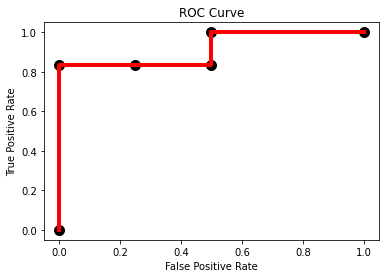

In [20]:
x = np.array([roc(m_0)['fp_rate'], roc(m_2)['fp_rate'], roc(m_4)['fp_rate'], roc(m_6)['fp_rate'],roc(m_8)['fp_rate'],roc(m_1)['fp_rate']])
y = np.array([roc(m_0)['tp_rate'], roc(m_2)['tp_rate'], roc(m_4)['tp_rate'], roc(m_6)['tp_rate'],roc(m_8)['tp_rate'],roc(m_1)['tp_rate']])

plt.plot(x, y, 'o', markersize = 10, color = 'black')
plt.plot(x,y, linewidth = 4, color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### AUROC:

The AUROC score evaluates the efficiency of model on a scale from 0 to 1; where 1 indicated a perfect classifier. 

## QUESTION 3: Evaluation Metrics

In [21]:
def new_thresh(y_hat):
  '''
  New decision threshold
  p >= 0.5
  '''
  if y_hat>=0.5:
    return 1
  return 0

In [22]:
df['0.5'] = df.apply(lambda x: new_thresh(x['y_hat']), axis = 1)
df


,x1,x2,y,y_hat,0,0.2,0.4,0.6,0.8,1,0.5
0,0,0,1,0.952574,1,1,1,1,1,0,1
1,0,1,1,0.268941,1,1,0,0,0,0,0
2,0,2,0,0.006693,1,0,0,0,0,0,0
3,1,0,1,0.997527,1,1,1,1,1,0,1
4,1,1,1,0.880797,1,1,1,1,1,0,1
5,1,2,0,0.119203,1,0,0,0,0,0,0
6,2,0,1,0.999877,1,1,1,1,1,0,1
7,2,1,1,0.993307,1,1,1,1,1,0,1
8,2,2,0,0.731059,1,1,1,1,0,0,1
9,-1,0,0,0.500000,1,1,1,0,0,0,1


In [24]:
conf_matrix = cmatrix(df['y'],df['0.5'])
conf_matrix

{'TP': 5, 'FN': 1, 'FP': 2, 'TN': 2}

In [25]:
accuracy = (conf_matrix['TP']+conf_matrix['TN'])/(conf_matrix['TP']+conf_matrix['FN']+conf_matrix['FP']+conf_matrix['TN'])
precision = (conf_matrix['TP'])/(conf_matrix['TP']+conf_matrix['FP'])
recall = (conf_matrix['TP'])/(conf_matrix['TP']+conf_matrix['FN']) #sensativity
specificity= (conf_matrix['TN'])/(conf_matrix['TN']+conf_matrix['FP'])

In [26]:
print(f"Accuracy: {accuracy *100}")
print(f"Precision: {precision *100}")
print(f"Recall: {recall *100}")
print(f"Specificity: {specificity *100}")

Accuracy: 70.0
Precision: 71.42857142857143
Recall: 83.33333333333334
Specificity: 50.0
